# Index Price (in finance/economics)

The index price is the current value or level of a market index — basically the number that tells you how the index is performing at a given time

In [2]:
# Now we have to create a model a which takes two inputs interest rate and unemployment rate and give us the index rate
import pandas as pd 
import numpy as np 

In [9]:
# Read Dataset
df_index=pd.read_csv("economic_index.csv")
df_index

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256
5,5,2017,7,2.50,5.6,1254
6,6,2017,6,2.50,5.5,1234
7,7,2017,5,2.25,5.5,1195
8,8,2017,4,2.25,5.5,1159
9,9,2017,3,2.25,5.6,1167


In [10]:
# Drop Unneccessary Columns 
df_index.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

In [11]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [13]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

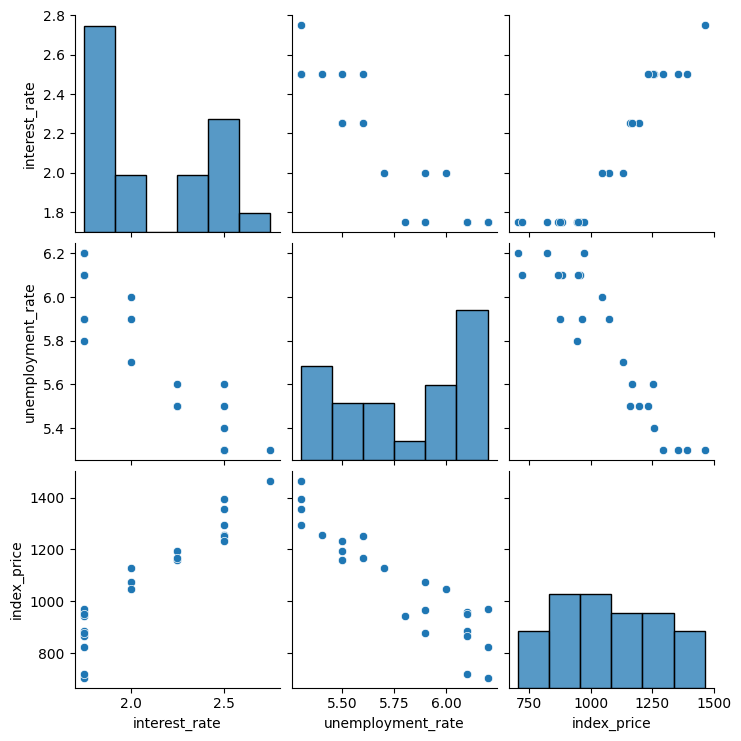

In [14]:
import seaborn as sns 
sns.pairplot(df_index)

In [16]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [18]:
# Visualize Data Points More Closely
import matplotlib.pyplot as plt 

Text(0, 0.5, 'unemployment_rate')

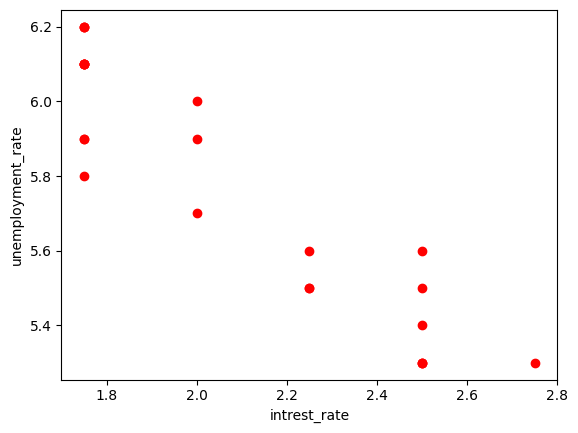

In [23]:
plt.scatter(df_index["interest_rate"],df_index["unemployment_rate"],color="r")
plt.xlabel("intrest_rate")
plt.ylabel("unemployment_rate")

In [25]:
# get my independent and dependent_features 
X=df_index.iloc[:,:-1]
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [28]:
Y=df_index.iloc[:,-1]
Y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [29]:
# do the train test split 
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

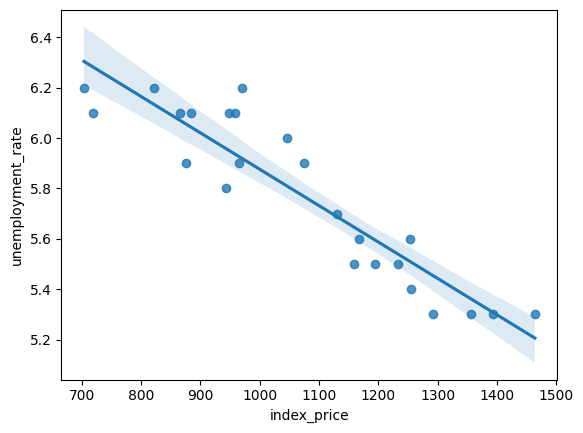

In [35]:
sns.regplot(x=df_index['index_price'],y=df_index['unemployment_rate'])

In [36]:
# do the standardization 
from sklearn.preprocessing import StandardScaler


In [47]:
standard_scaler=StandardScaler()
x_train=standard_scaler.fit_transform(x_train)
x_test=standard_scaler.transform(x_test)
x_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [48]:
from sklearn.linear_model import LinearRegression

In [44]:
regression=LinearRegression()
regression.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [53]:
# cross validation score on the multiple linear regression model 
from sklearn.model_selection import cross_val_score
crose_validatoin_score=cross_val_score(regression,x_train,y_train,cv=3,scoring="neg_mean_squared_error")

In [56]:
crose_validatoin_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [57]:
y_predict=regression.predict(x_test)

In [58]:
y_predict

array([612.64375972, 487.12736973, 680.03156939, 498.75308579,
       544.07270669, 601.01804366])

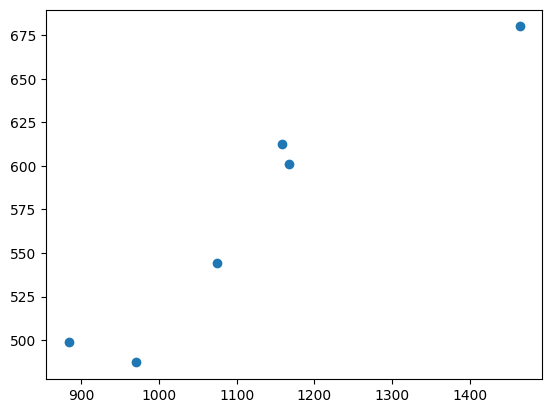

In [59]:
plt.scatter(y_test,y_predict)

In [61]:
residuals=y_test-y_predict
residuals

8     546.356240
16    483.872630
0     783.968431
18    385.246914
11    530.927293
9     565.981956
Name: index_price, dtype: float64

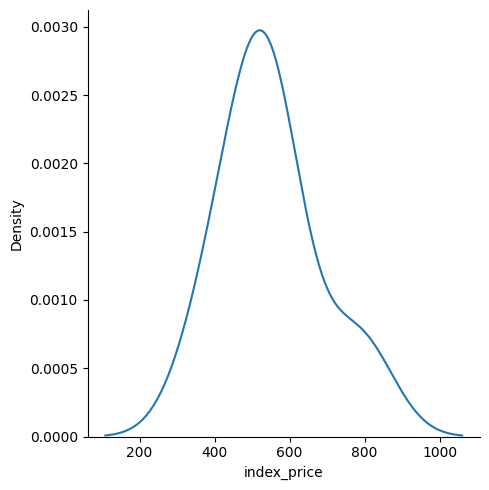

In [63]:
sns.displot(residuals,kind="kde")

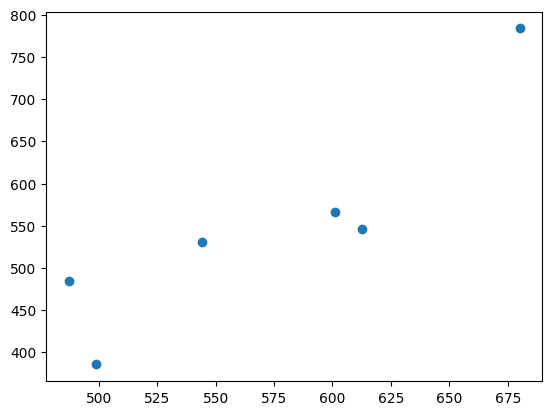

In [64]:
plt.scatter(y_predict,residuals)

In [67]:
import statsmodels.api as sms
model=sms.OLS(y_train,x_train).fit()

In [68]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Fri, 19 Sep 2025   Prob (F-statistic):                       0.754
Time:                        05:55:11   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
regression.coef_

array([  88.27275507, -116.25716066])